In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/sales_data.csv")

# Preview the data
df.head()


,Date,Product,Category,Quantity,Unit Price,Revenue,Customer
0,2024-05-06,Shampoo,Personal Care,1,100,100,Rajesh Kumar
1,2024-03-12,Rice,Grocery,1,60,60,Rajesh Kumar
2,2024-06-22,Notebook,Stationery,2,50,100,Amit Patel
3,2024-05-12,Shampoo,Personal Care,3,100,300,Rajesh Kumar
4,2024-03-20,Oil,Grocery,4,150,600,Amit Patel


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Display all columns
pd.set_option('display.max_columns', None)

# Load the CSV
df = pd.read_csv("sales_data.csv")

# Preview the first few rows
df.head()


,Date,Product,Category,Quantity,Unit Price,Revenue,Customer
0,2024-05-06,Shampoo,Personal Care,1,100,100,Rajesh Kumar
1,2024-03-12,Rice,Grocery,1,60,60,Rajesh Kumar
2,2024-06-22,Notebook,Stationery,2,50,100,Amit Patel
3,2024-05-12,Shampoo,Personal Care,3,100,300,Rajesh Kumar
4,2024-03-20,Oil,Grocery,4,150,600,Amit Patel


In [3]:
# Check datatypes and null values
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        180 non-null    object
 1   Product     180 non-null    object
 2   Category    180 non-null    object
 3   Quantity    180 non-null    int64 
 4   Unit Price  180 non-null    int64 
 5   Revenue     180 non-null    int64 
 6   Customer    180 non-null    object
dtypes: int64(3), object(4)
memory usage: 10.0+ KB


,0
Date,0
Product,0
Category,0
Quantity,0
Unit Price,0
Revenue,0
Customer,0


In [4]:
total_revenue = df['Revenue'].sum()
print("💰 Total Revenue:", total_revenue)


💰 Total Revenue: 155870


In [5]:
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False)
print("🏆 Top-Selling Products:\n", top_products)


🏆 Top-Selling Products:
 Product
Jeans       90000
T-shirt     37500
Oil         12750
Shampoo      5500
Notebook     3500
Rice         3300
Soap         1920
Pen          1400
Name: Revenue, dtype: int64


In [6]:
category_sales = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
print("📦 Sales by Category:\n", category_sales)


📦 Sales by Category:
 Category
Clothing         127500
Grocery           16050
Personal Care      7420
Stationery         4900
Name: Revenue, dtype: int64


In [7]:
top_customers = df.groupby('Customer')['Revenue'].sum().sort_values(ascending=False).head(5)
print("👤 Top 5 Customers:\n", top_customers)


👤 Top 5 Customers:
 Customer
Priya Verma     45290
Amit Patel      39020
Neha Singh      30800
Sohail Khan     15230
Rajesh Kumar    13090
Name: Revenue, dtype: int64


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and group by month
monthly_sales = df.groupby(df['Date'].dt.to_period("M"))['Revenue'].sum()

# Convert PeriodIndex to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

print("📆 Monthly Sales:\n", monthly_sales)


📆 Monthly Sales:
 Date
2024-01-01    19480
2024-02-01    20800
2024-03-01    29360
2024-04-01    20480
2024-05-01    37270
2024-06-01    28480
Freq: MS, Name: Revenue, dtype: int64


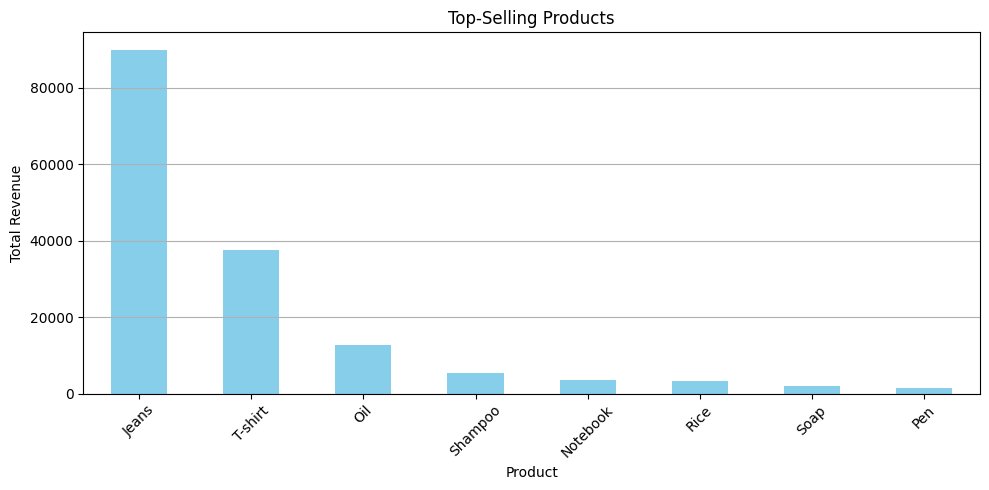

In [9]:
top_products.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top-Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


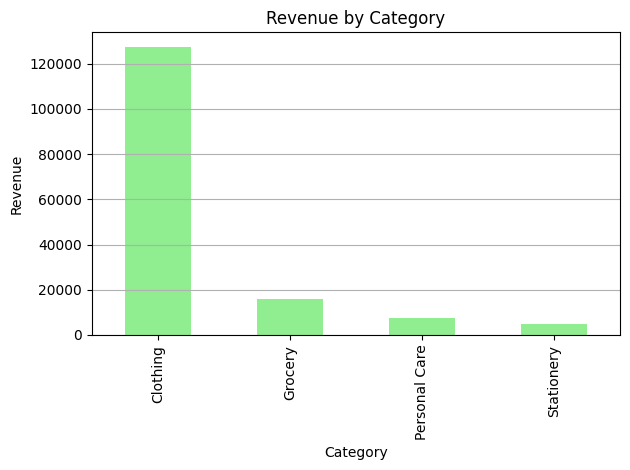

In [10]:
category_sales.plot(kind='bar', color='lightgreen')
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


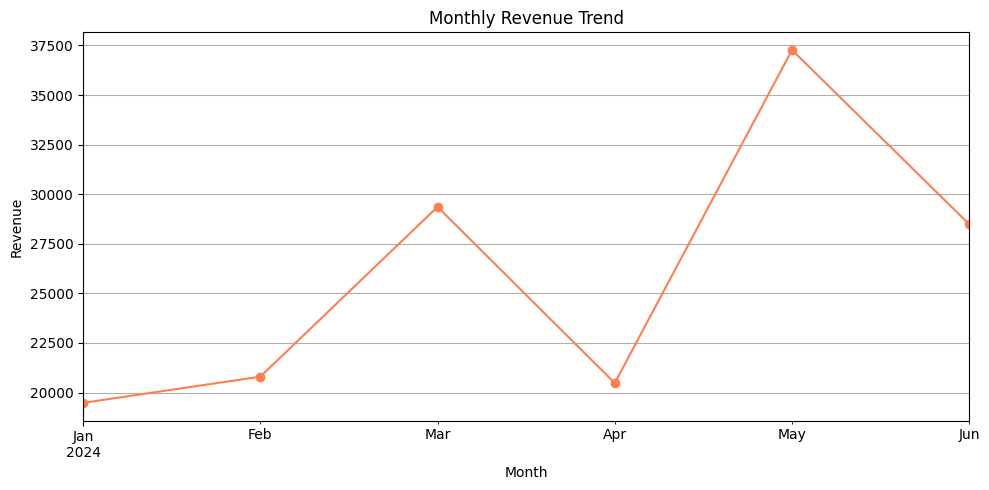

In [11]:
monthly_sales.plot(kind='line', marker='o', figsize=(10,5), color='coral')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()
